<a href="https://colab.research.google.com/github/yulrio/PML/blob/main/1_D_CIFAR_10_128_64_CNN_512_256_128_lr_0001_Adam_cat_cros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.7.0


# Import the CIFAR10 small images dataset

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 10)
(10000, 32, 32, 3)
(10000, 10)


In [ ]:
print(y_train[0])

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


(60000, 32, 32, 3)
(50000, 32, 32, 3)


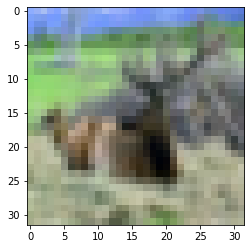

In [ ]:
import random
from sklearn.model_selection import train_test_split

# Concatenate train and test images
x = np.concatenate((x_train,x_test))
y = np.concatenate((y_train,y_test))

# Check shape
print(x.shape) # (60000, 32, 32, 3)

# Split data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=10000, random_state=random.randint(1000, 5000))

# Check shape
print(x_train.shape) # (50000, 32, 32, 3)

# View first image
plt.imshow(x_train[0])
plt.show()

# Preprocess the data

In [ ]:
classnames = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'Ankle truck']

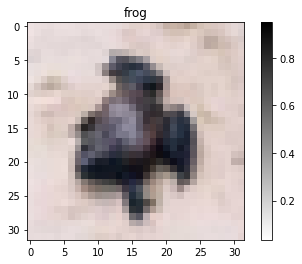

In [ ]:
i = 10
plt.figure()
plt.imshow(x_train[i], cmap=plt.cm.binary)
plt.colorbar()
plt.title(str(classnames[np.argmax(y_train[i])]))
plt.grid(False)
plt.show()

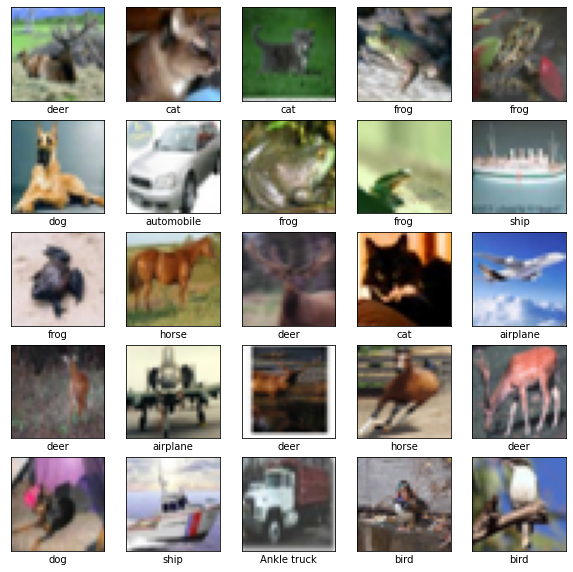

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(classnames[np.argmax(y_train[i])])
plt.show()

# Prepare the data

In [ ]:
train_datagen = ImageDataGenerator()
train_generator = train_datagen.flow(x=x_train,
                                    y=y_train,
                                    batch_size=100)

validation_datagen = ImageDataGenerator()
validation_generator = validation_datagen.flow(x=x_test,
                                                y=y_test,
                                                batch_size=100)

In [ ]:
print(f"Ukuran data training : {train_generator.x.shape}")
print(f"Ukuran label training: {train_generator.y.shape}")
print(f"Ukuran data validasi: {validation_generator.x.shape}")
print(f"Ukuran label validasi: {validation_generator.y.shape}")

Ukuran data training : (50000, 32, 32, 3)
Ukuran label training: (50000, 10)
Ukuran data validasi: (10000, 32, 32, 3)
Ukuran label validasi: (10000, 10)


# Build the model

In [ ]:
model = tf.keras.Sequential([
    # The first convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])

# Compile Model

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 128)       3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        73792     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dense (Dense)               (None, 512)               1

In [ ]:
model.compile(loss = 'categorical_crossentropy', 
                  optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), 
                  metrics=['accuracy'])

# Train the model

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.995):
      print("\nAkurasi pembelajaran telah mencapai 99.5%  sehingga pelatihan dihentikan!")
      self.model.stop_training = True
callbacks = myCallback()

In [ ]:
history = model.fit(train_generator,
                    epochs=100,
                    validation_data=validation_generator,
                    callbacks=callbacks)

Epoch 1/100
500/500 [==============================] - 13s 11ms/step - loss: 1.7522 - accuracy: 0.3657 - val_loss: 1.4772 - val_accuracy: 0.4581
Epoch 2/100
500/500 [==============================] - 5s 10ms/step - loss: 1.4034 - accuracy: 0.4941 - val_loss: 1.3132 - val_accuracy: 0.5328
Epoch 3/100
500/500 [==============================] - 5s 10ms/step - loss: 1.2803 - accuracy: 0.5428 - val_loss: 1.2417 - val_accuracy: 0.5627
Epoch 4/100
500/500 [==============================] - 5s 10ms/step - loss: 1.1924 - accuracy: 0.5751 - val_loss: 1.1642 - val_accuracy: 0.5879
Epoch 5/100
500/500 [==============================] - 5s 10ms/step - loss: 1.1129 - accuracy: 0.6053 - val_loss: 1.0975 - val_accuracy: 0.6201
Epoch 6/100
500/500 [==============================] - 5s 10ms/step - loss: 1.0523 - accuracy: 0.6300 - val_loss: 1.0616 - val_accuracy: 0.6290
Epoch 7/100
500/500 [==============================] - 5s 10ms/step - loss: 0.9956 - accuracy: 0.6487 - val_loss: 1.0443 - val_accuracy

# Evaluate accuracy

In [ ]:
test_loss, test_acc = model.evaluate(validation_generator, verbose=2)

print('\nTest accuracy:', test_acc)

100/100 - 0s - loss: 2.0152 - accuracy: 0.7059 - 425ms/epoch - 4ms/step

Test accuracy: 0.7059000134468079


# Make predictions

In [ ]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [ ]:
predictions = probability_model.predict(validation_generator.x)

In [ ]:
predictions[0]

array([0.08581028, 0.08581028, 0.08581028, 0.08599211, 0.08902512,
       0.22428171, 0.08581028, 0.08583941, 0.08581028, 0.08581028],
      dtype=float32)

In [ ]:
np.argmax(predictions[0])

5

In [ ]:
np.argmax(validation_generator.y[0])

5

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = np.argmax(true_label[i]), img[i]
#   print(f"{np.argmax(validation_generator.y[0])} : {classnames[true_label]}")
#   print(predictions_array)
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)
  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(classnames[predicted_label],
                                100*np.max(predictions_array),
                                classnames[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = np.argmax(true_label[i])
  plt.grid(False)
  plt.xticks(range(10),rotation=45)
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

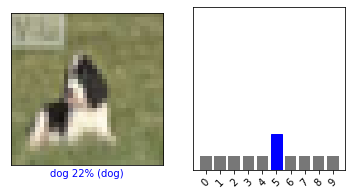

In [ ]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], validation_generator.y, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  validation_generator.y)
plt.show()

11


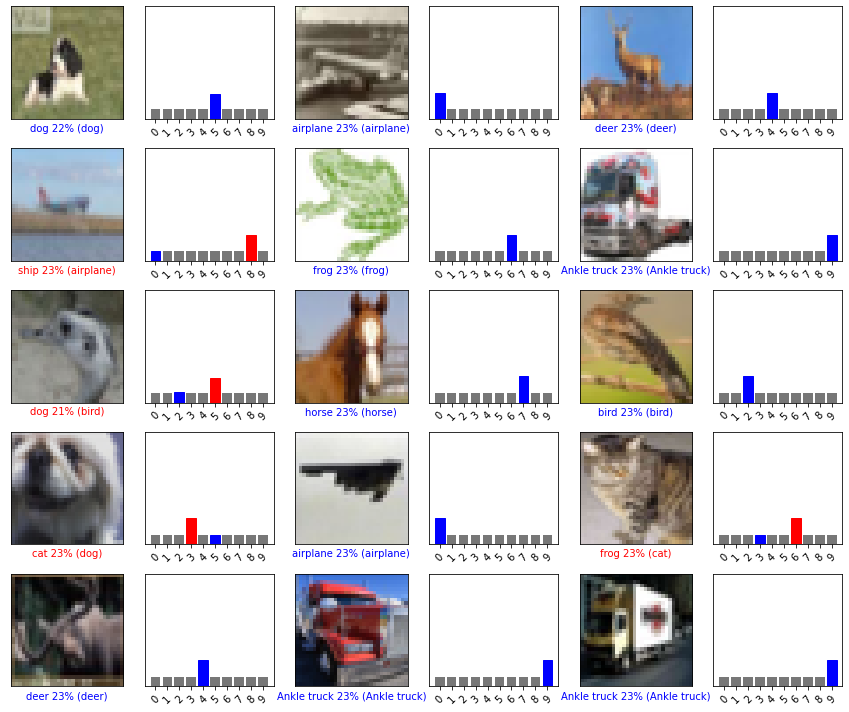

In [ ]:
correct = 0
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], validation_generator.y, validation_generator.x)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], validation_generator.y)
  if np.argmax(predictions[i]) == np.argmax(validation_generator.y[i]):
      correct += 1
print(correct)
plt.tight_layout()
plt.show()

# Create a plot of accuracy and loss over time

In [ ]:
def plot_loss_acc(history):
  '''Plots the training and validation loss and accuracy from a history object'''
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(acc))

  plt.plot(epochs, acc, 'r', label='Training accuracy')
  plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
  plt.title('Training and validation accuracy')
  plt.legend()

  plt.figure()

  plt.plot(epochs, loss, 'r', label='Training Loss')
  plt.plot(epochs, val_loss, 'b', label='Validation Loss')
  plt.title('Training and validation loss')
  plt.legend()

  plt.show()

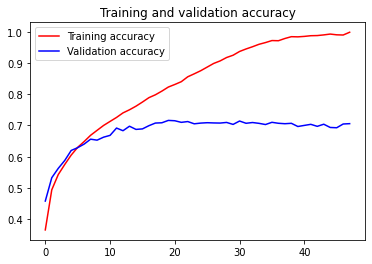

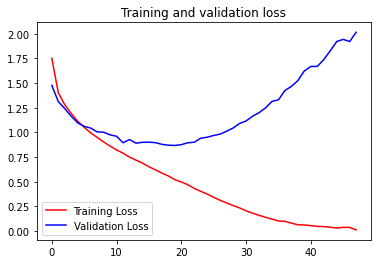

In [ ]:
# Plot training results
plot_loss_acc(history)